#### Install & Import Libraries

In [ ]:
#!pip install yfinance

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Import functions from scripts
from scripts.data_collection import fetch_stock_data
from scripts.data_preprocessing import preprocess_data

### Stock Data Analysis

In this data science project, we have conducted a comprehensive analysis of historical stock data for **Apple Inc.** (stock symbol: *AAPL*), one of the world's foremost technology companies.

Our project encompasses the following key aspects:
- **Data Collection**: We gathered historical stock price data for AAPL, a vital step in understanding its performance over time.

- **Data Preprocessing**: Prior to analysis, we meticulously preprocessed the data, addressing issues such as missing values and calculating daily returns.

- **Data Visualization**:

Please note that you can easily adapt this notebook to analyze data for other stocks of interest by simply replacing *AAPL* with the desired stock symbol.


### Section 0: Data Collection & Pre-Processing

#### Stock Background

In the provided example and discussion, we are analyzing the historical stock data of Apple Inc., which is a well-known and prominent technology company. Apple Inc. is primarily known for its consumer electronics, software, and services, including products like the iPhone, iPad, Mac, and various software applications.

The stock symbol for Apple Inc. is AAPL. This analysis focuses on understanding the historical performance of Apple Inc.'s stock using data science techniques, including data collection, preprocessing, portfolio metrics calculation, and portfolio optimization. Please note that you can adapt this analysis to analyze data for other stocks by replacing "AAPL" with the stock symbol of your choice.


In [3]:
# Set your stock symbol, date range, and risk-free rate
stock_symbol = "AAPL"  # Replace with your chosen stock symbol
start_date = "2010-01-01"
end_date = "2020-12-31"
risk_free_rate = 0.03  # Adjust as needed

# Fetch stock data using the imported function
stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

# Display collected stock data
display(stock_data)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.856796,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.850616,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.494781,124486200


In [4]:
# Preprocess the data using the imported function
preprocessed_data = preprocess_data(stock_data)

# Display pre-processed data
display(preprocessed_data)

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Log Returns,Rolling Mean,Rolling Std
Date,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600,NaN,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800,0.001729,0.001728,NaN,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000,-0.015906,-0.016034,NaN,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200,-0.001849,-0.001851,NaN,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800,0.006648,0.006626,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.856796,88223700,-0.006976,-0.007000,122.112873,4.221308
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.850616,54930100,0.007713,0.007683,122.897076,4.123098
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.494781,124486200,0.035765,0.035141,123.885936,4.419123


### Section 1: Exploratory Stock Data Analysis

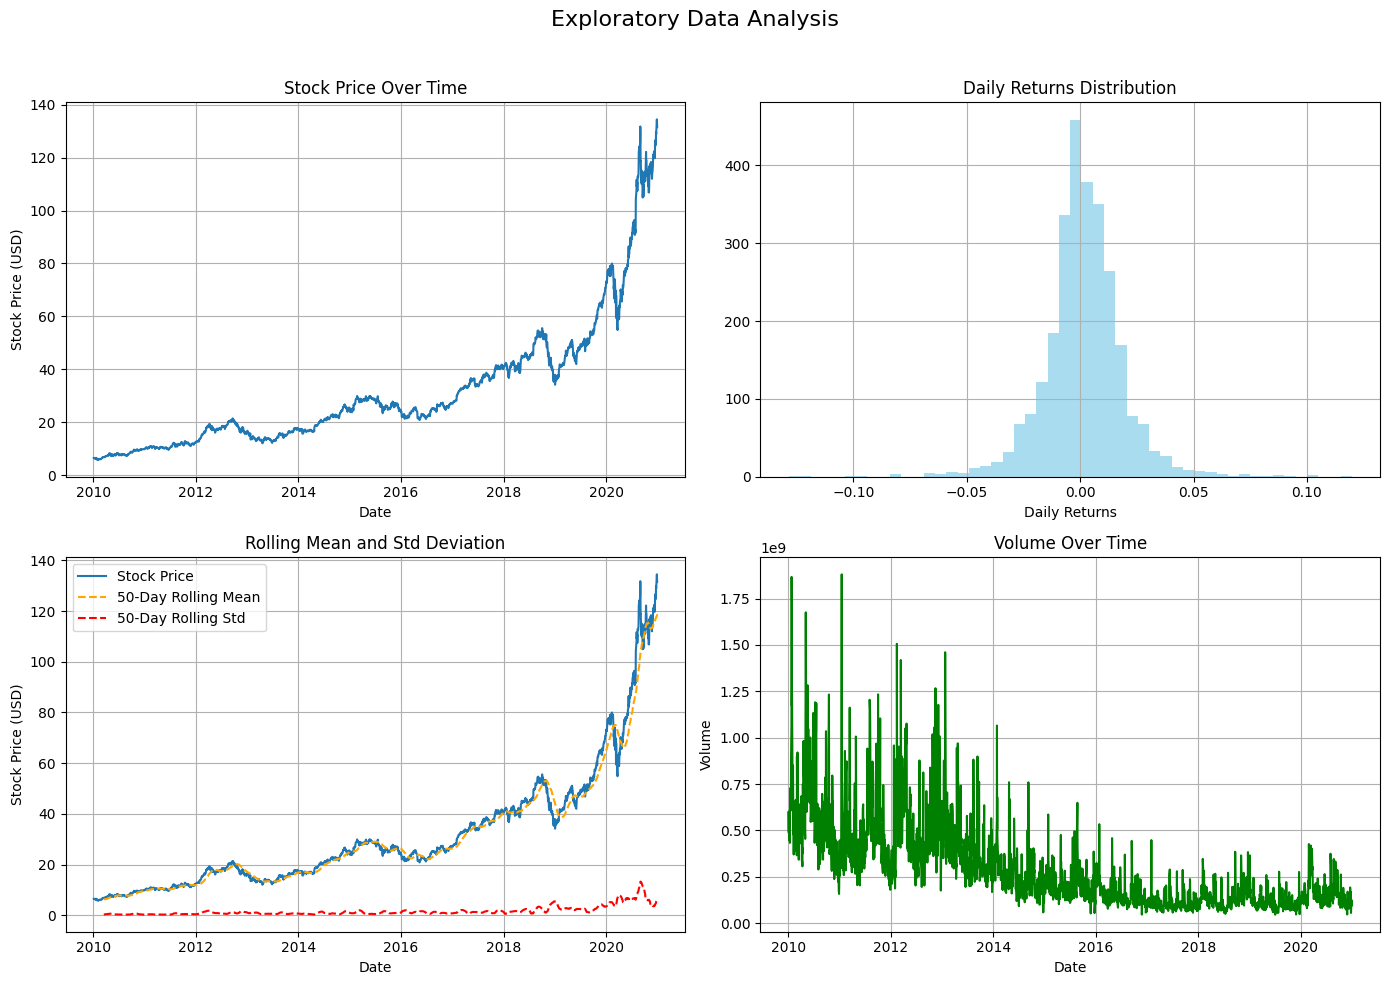

In [5]:
# Create a 2x2 subplot layout for EDA plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Exploratory Data Analysis", fontsize=16)

# Plot 1: Stock Price Over Time
axes[0, 0].plot(stock_data['Adj Close'])
axes[0, 0].set_title("Stock Price Over Time")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Stock Price (USD)")
axes[0, 0].grid(True)

# Plot 2: Daily Returns Distribution
axes[0, 1].hist(stock_data['Adj Close'].pct_change().dropna(), bins=50, color='skyblue', alpha=0.7)
axes[0, 1].set_title("Daily Returns Distribution")
axes[0, 1].set_xlabel("Daily Returns")
axes[0, 1].grid(True)

# Plot 3: Rolling Mean and Standard Deviation
axes[1, 0].plot(stock_data['Adj Close'], label='Stock Price')
axes[1, 0].plot(stock_data['Adj Close'].rolling(window=50).mean(), label='50-Day Rolling Mean', linestyle='--', color='orange')
axes[1, 0].plot(stock_data['Adj Close'].rolling(window=50).std(), label='50-Day Rolling Std', linestyle='--', color='red')
axes[1, 0].set_title("Rolling Mean and Std Deviation")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Stock Price (USD)")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Volume Over Time
axes[1, 1].plot(stock_data['Volume'], color='green')
axes[1, 1].set_title("Volume Over Time")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Volume")
axes[1, 1].grid(True)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the EDA plots
plt.show()

**Comment:** In the code examples and discussions provided earlier, I used only Apple Inc. (AAPL) stock as an example for simplicity and to demonstrate the steps involved in portfolio optimization using a single asset. In practice, portfolio optimization involves selecting a combination of multiple assets to construct a diversified portfolio. To extend the analysis, we will include multiple assets in the next Jupyter notebook.